## Linear regression

A **linear** regression is a **linear approximation** of a **casual relationship** between **two or more variables**:

* Dependent varialble $y$
* Independent varialble $x_1, x_2, ... x_n$
* The dependent variable $y$ is assume to be a linear combination of the independent varialbels + a 0 mean noise factor:
$$ \large y = \beta_0 + \beta_1*x_1 + \beta_2*x_2 ... \beta_n * x_n + \epsilon$$


### Regression fit metrics

There are multiple metrics available for measuring the goodness of fit of a regression function:
* [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) - The average of the squared error: $\displaystyle\frac{1}{n}\sum_{t=1}^{n}e_t^2$
* [Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error): - The average of the absolut error: $\displaystyle\frac{1}{n}\sum_{t=1}^{n}|e_t|$
* [R-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination) - $R^2$ - the proportion of the variation explained by our model: $\displaystyle\ R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$ whereas:
  * $SS_{tot}$ is the overall variablility in the dataset: $\displaystyle\sum_{i=1}^{n}{(y_i -\bar{y})^2}$
  * $SS_{res}$ is the overall variability in the error $\displaystyle\sum_{i=1}^{n}e_i^2$
  * R2 ranges from 0 (the model did not explain any of the variance in the dataset) to 1 (the model perfectly explains all variance in the dataset)

* [Adjusted R-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2) - This metric takes into account the model complexity as well, punishing models which have many dependent varialbles which does not contribute to the explainability of the dataset. Defined as: $R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$ - where $p$ in the total number of predictros in the model and $n$ is the sample size.

<font size=3 color='red'><b>Exercise: write a function called compute_regression_metrics() that computes 'MSE', 'MAE' and 'R2' given a dataframe with proper colmuns.</b></font>

*Don't compute adjusted r2, as it requires n_predictors (you'd call it from a different place)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def compute_regression_metrics(y_true, y_pred):
  metrics = {
    'MSE': mean_squared_error,
    'MAE': mean_absolute_error,
    'R2': r2_score,
  }

  return {
      name: metric(y_true, y_pred)
      for name, metric in metrics.items()
  }

<font size=3 color='red'><b>Exercise: write a function that computes adjusted r2 score.</b></font>

In [20]:
from sklearn.metrics import r2_score

def adjusted_r2_score(y_true, y_pred, n_predictors):
  r2 = r2_score(y_true, y_pred)
  n = len(y_true)
  p = n_predictors

  adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

  return adjusted_r2

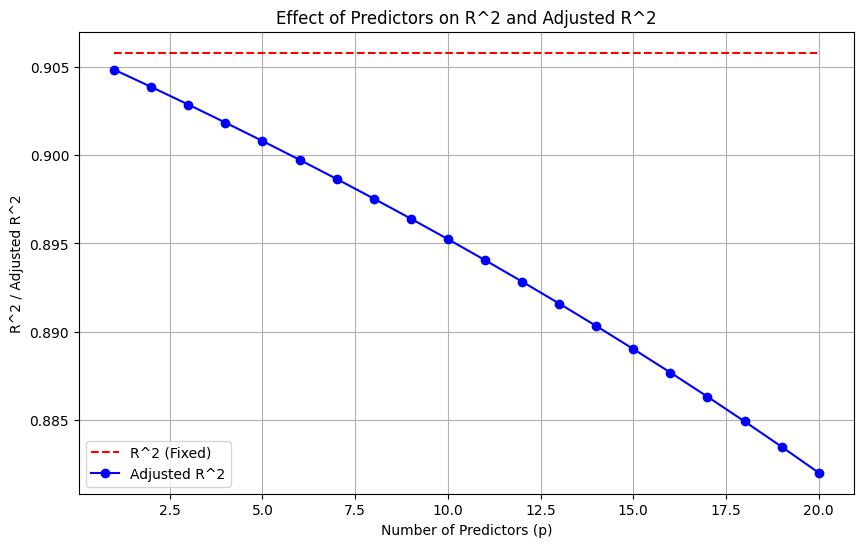

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate some data
np.random.seed(42)
n_observations = 100
true_y = np.random.rand(n_observations) * 10
pred_y = true_y + np.random.normal(0, 1, n_observations)  # Add some noise

# Fixed R^2 value for simplicity
r2 = r2_score(true_y, pred_y)

# Compute Adjusted R-Squared for increasing predictors
n_predictors_range = range(1, 21)  # Number of predictors
adjusted_r2_values = [adjusted_r2_score(true_y, pred_y, p) for p in n_predictors_range]

# Plot R^2 vs Adjusted R^2
plt.figure(figsize=(10, 6))
plt.plot(n_predictors_range, [r2] * len(n_predictors_range), label='R^2 (Fixed)', linestyle='--', color='red')
plt.plot(n_predictors_range, adjusted_r2_values, label='Adjusted R^2', marker='o', color='blue')
plt.xlabel('Number of Predictors (p)')
plt.ylabel('R^2 / Adjusted R^2')
plt.title('Effect of Predictors on R^2 and Adjusted R^2')
plt.legend()
plt.grid()
plt.show()

The plot shows:
* R^2 remains constant as it does not penalize additional predictors.
* Adjusted 𝑅^2 decreases when the number of predictors becomes excessive relative to the data.

## Multiple predictors - Predicting university scores

The following dataset was collected from 100 uni grads and contains information about their high school grades, their psychometric exam score, their participation in lesson scores and their university graduation score:

In [22]:
import pandas as pd

In [23]:
df = pd.read_csv('university_scores.csv')
df.head()

,high_school_score,internal_exam_score,psycho_score,attandance_score,participation_score,uni_score
0,91,7865,658,8,8,95
1,80,6968,645,4,7,82
2,92,6856,548,3,6,86
3,92,7352,432,8,6,80
4,83,8338,544,4,6,78


NOTE: we'll skip train-test split THIS TIME and use train as the full setm

<font size=3 color='red'><b>Exercise: check the features correlation with the target variable (uni_score).</b></font>

In [24]:
df.corr()

,high_school_score,internal_exam_score,psycho_score,attandance_score,participation_score,uni_score
high_school_score,1.000000,0.309996,0.090276,0.146719,0.033128,0.525738
internal_exam_score,0.309996,1.000000,0.043174,-0.065902,-0.030168,0.115130
psycho_score,0.090276,0.043174,1.000000,0.050492,0.216056,0.652342
attandance_score,0.146719,-0.065902,0.050492,1.000000,-0.051075,0.046468
participation_score,0.033128,-0.030168,0.216056,-0.051075,1.000000,0.662027
uni_score,0.525738,0.115130,0.652342,0.046468,0.662027,1.000000


<font size=3 color='red'><b>Question: which features would probably be most important for regression according to this view?</b></font>

In [25]:
df.corr()[['uni_score']].sort_values('uni_score', ascending=False)

,uni_score
uni_score,1.000000
participation_score,0.662027
psycho_score,0.652342
high_school_score,0.525738
internal_exam_score,0.115130
attandance_score,0.046468


<font size=3 color='red'><b>Exercise: write a compute_regression fuction which fits a regression model on a given data set and returns all its metrics (including r^2 adjusted).</b></font>

In [27]:
from sklearn.linear_model import LinearRegression

def compute_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    metrics = compute_regression_metrics(y, y_pred)
    # add adjusted - now we have n_predictors
    metrics['adjusted_R2'] = adjusted_r2_score(y, y_pred, X.shape[1])

    return model, metrics

<font size=3 color='red'><b>Exercise: write a compare_regression function which computes regression on all possible combinations of predictors, and store the results in a new dataframe.
The output dataframe should consist of a table with 3 columns: the name of the predictors used, the R squared score and the adjusted R square score.
Sort it ascending by the adjested score</b></font>

In [29]:
import itertools


def get_combinations(values, min_count=1, max_count=None):
    if max_count == None:
      max_count = len(values)

    for k in range(min_count, max_count + 1):
      for comb in itertools.combinations(values, k):
        yield comb


print(list(get_combinations(['a', 'b', 'c'])))

[('a',), ('b',), ('c',), ('a', 'b'), ('a', 'c'), ('b', 'c'), ('a', 'b', 'c')]


In [37]:
def compare_regression(data_df, target_col):
    results = []
    predictor_cols = [c for c in df.columns if c != target_col]
    y = data_df[target_col]

    for cols in get_combinations(predictor_cols):
        X = data_df[list(cols)]
        model, metrics = compute_regression(X, y)
        results.append((cols, metrics['R2'], metrics['adjusted_R2']))

    return pd.DataFrame(results,
                        columns=['predictors', 'R2', 'Adjusted R2']
                        ).sort_values(by='Adjusted R2', ascending=False)

In [38]:
pd.set_option('display.max_colwidth',200)

compare_results_df = compare_regression(df, 'uni_score')
compare_results_df

,predictors,R2,Adjusted R2
26,"(high_school_score, internal_exam_score, psycho_score, participation_score)",0.924446,0.921265
30,"(high_school_score, internal_exam_score, psycho_score, attandance_score, participation_score)",0.925004,0.921015
19,"(high_school_score, psycho_score, participation_score)",0.923200,0.920800
28,"(high_school_score, psycho_score, attandance_score, participation_score)",0.923566,0.920348
29,"(internal_exam_score, psycho_score, attandance_score, participation_score)",0.725273,0.713705
22,"(internal_exam_score, psycho_score, participation_score)",0.722200,0.713519
13,"(psycho_score, participation_score)",0.710375,0.704403
24,"(psycho_score, attandance_score, participation_score)",0.712638,0.703657
8,"(high_school_score, participation_score)",0.692380,0.686037
17,"(high_school_score, internal_exam_score, participation_score)",0.692904,0.683308


In [39]:
best_model = compare_results_df.loc[compare_results_df['Adjusted R2'].idxmax()]
best_model

,26
predictors,"(high_school_score, internal_exam_score, psycho_score, participation_score)"
R2,0.924446
Adjusted R2,0.921265


In [40]:
best_model = compare_results_df.loc[compare_results_df['R2'].idxmax()]
best_model

,30
predictors,"(high_school_score, internal_exam_score, psycho_score, attandance_score, participation_score)"
R2,0.925004
Adjusted R2,0.921015


<font size=3 color='red'><b>Question: According to the results above, which is the most useful predictor/feature to predict the target?</b></font>

Answer: participation_score, as it appears in all the top-ranked model

### Feature importance

In [49]:
target_col = 'uni_score'
predictor_cols = [c for c in df.columns if c != target_col]

model, metrics = compute_regression(df[predictor_cols], df[target_col])

metrics

{'MSE': 2.0901627092128385,
 'MAE': 1.1518959817419208,
 'R2': 0.9250042084357297,
 'adjusted_R2': 0.9210150705865664}

In [50]:
def print_model_coef(model):
  print('const', '\t', model.intercept_)

  for name, c in zip(predictor_cols, model.coef_):
    print(name, '\t', c)

print_model_coef(model)

const 	 -6.8450354888399545
high_school_score 	 0.6094970734974131
internal_exam_score 	 -0.00037568330110454183
psycho_score 	 0.02760403310839322
attandance_score 	 -0.050066239808431355
participation_score 	 3.540492131724993


When all predictors are zero, the model predicts −6.845 for uni_score.

<font size=3 color='red'><b>Question: According to the results above which is the most useful predictor/feature to predict the target?</b></font>

participation_score is the most useful predictor based on its large coefficient value.

For feature importance and in general, model interpertation, we need to scale all the features to the same magnitude. We can do it by either:
* Standartization - transform each feature into a zero one unit variance distribution
* Normalization/Scaling - transform each feature into the intreval (0,1] by removing the minimum value and dividing by the max-min value.

<font size=3 color='red'><b>Question: After normalizing the predictors, analyze the coefficients of the model. What can you infer about the importance of each feature in predicting the target?</b></font>

In [74]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler  = StandardScaler()
scaler = MinMaxScaler()

scaler.fit(df[predictor_cols])

MinMaxScaler()

In [75]:
df_scaled = scaler.transform(df[predictor_cols])
df_scaled = pd.DataFrame(df_scaled, columns=predictor_cols)
df_scaled.agg(['mean','std']).apply(lambda x: round(x, ndigits=5))

,high_school_score,internal_exam_score,psycho_score,attandance_score,participation_score
mean,0.46875,0.48346,0.52006,0.49500,0.10000
std,0.17381,0.19721,0.20464,0.31976,0.20101


In [69]:
df_scaled['uni_score'] = df.uni_score
normalized_model, metrics = compute_regression(df_scaled[predictor_cols], df_scaled[target_col])
metrics

{'MSE': 2.090162709212842,
 'MAE': 1.151895981741859,
 'R2': 0.9250042084357296,
 'adjusted_R2': 0.9210150705865663}

In [70]:
print_model_coef(normalized_model)

const 	 81.36
high_school_score 	 2.529779995281098
internal_exam_score 	 -0.21245132083339086
psycho_score 	 2.619145299960885
attandance_score 	 -0.12743210436483104
participation_score 	 2.8323937053799937


- participation_score has the highest standardized coefficient, making it the most predictive feature for uni_score.
- internal_exam_score has a non-trivial inverse impact.

### Logistic regression

<font size=3 color='red'><b>Task:
Train a logistic regression model to predict whether a student will achieve a high score (above 75) or low score (75 or below) in their final grade. Use a pipeline to ensure proper preprocessing and apply GridSearchCV to optimize the model’s hyperparameters.</b></font>

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Convert target to binary
df['high_score'] = (df['uni_score'] > 75).astype(int)

# Define predictors and target
X = df[predictor_cols]
y = df['high_score']

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Set up a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=1000))
])

# Step 4: Define parameter grid for GridSearchCV
param_grid = {
    'log_reg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'log_reg__solver': ['liblinear', 'lbfgs']  # Solvers
}

# Step 5: Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 6: Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Parameters: {'log_reg__C': 100, 'log_reg__solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.95      1.00      0.97        19

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20

Confusion Matrix:
[[ 0  1]
 [ 0 19]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<font size=3 color='red'><b>Task:
Train a multiclass logistic regression model to classify students' scores into three categories: Low, Medium, and High. Your goal is to use logistic regression to predict the score category based on the given predictors and evaluate the model's performance.</b></font>

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/l


Classification Report:
              precision    recall  f1-score   support

        High       0.95      1.00      0.97        19
      Medium       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



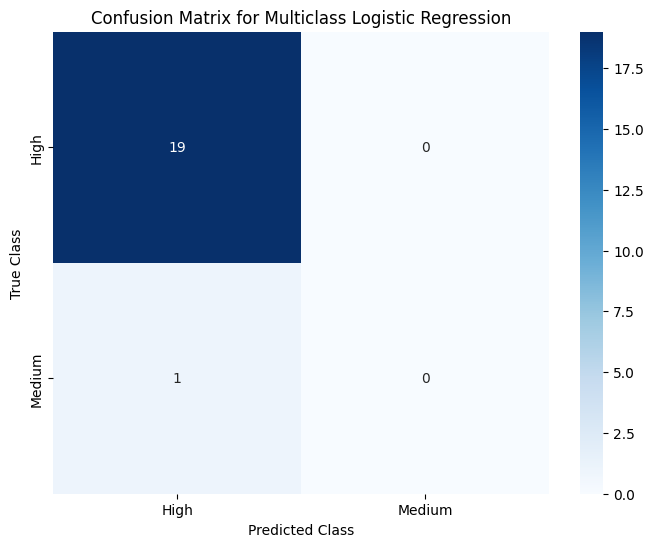

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a multiclass target variable
# Assuming uni_score is numeric and continuous, we'll bin it into 3 classes:
# Low (<= 60), Medium (61-75), High (> 75)
df['score_category'] = pd.cut(
    df['uni_score'],
    bins=[-float('inf'), 60, 75, float('inf')],
    labels=['Low', 'Medium', 'High']
)

# Define predictors and multiclass target
X = df[predictor_cols]
y = df['score_category']

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Multiclass Logistic Regression
# Using 'multinomial' option for softmax regression
multi_log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
multi_log_reg.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = multi_log_reg.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=multi_log_reg.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=multi_log_reg.classes_, yticklabels=multi_log_reg.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix for Multiclass Logistic Regression')
plt.show()
